#DESAFIO#

O Sr. Jo√£o tem uma rede de quatro lojas, que pertencem ao e-commerce Alura Store. Ele quer vender uma dessas lojas para ter um capital e investir em um novo neg√≥cio. Como Analista de Dados, vou analisar qual dessas lojas tem o menor desempenho comparado √†s outras e, baseado na an√°lise, fazer um relat√≥rio e mostrar para Sr.Jo√£o qual loja ele deve vender.

As seguintes m√©tricas far√£o parte dessa an√°lise:

1. faturamento total de cada loja,
2. categorias mais populares,
3. m√©dia de avalia√ß√£o dos clientes,
4. produtos mais e menos vendidos e
5. custo m√©dio do frete.

### Importa√ß√£o dos dados



In [ ]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

In [ ]:
loja1.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento


##De acordo com as instru√ß√µes no Trello o faturamento √© para se considerar somente o Pre√ßo e n√£o o Frete.##

Inicialmente para que eu possa fazer refer√™ncia correta aos campos das colunas das tabelas de dados utilizei-me do comando:
```
print(loja1.columns)
```

In [ ]:
print(loja1.columns)

Index(['Produto', 'Categoria do Produto', 'Pre√ßo', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avalia√ß√£o da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


1. Identificado os campos recorri a fun√ß√£o .sum() da biblioteca pandas para obter a somat√≥ria da coluna 'Pre√ßo" e obter o faturamento de cada loja.
2. Como na base de dados os valores est√£o em formato americano, com "." ponto para os decimais, formatei a sa√≠da para o formato em moeda R$

In [ ]:
faturamento1 = loja1['Pre√ßo'].sum()
faturamento2 = loja2['Pre√ßo'].sum()
faturamento3 = loja3['Pre√ßo'].sum()
faturamento4 = loja4['Pre√ßo'].sum()

valor_formatado = format(faturamento1, ',.2f')
valor_formatado = valor_formatado.replace(',', 'X').replace('.', ',').replace('X', '.')
print(f'\nFaturamento da loja 1: R$ {valor_formatado}')



Faturamento da loja 1: R$ 1.534.509,12


Uma vez verificado a somat√≥ria e o formato de sa√≠da em R$ criei um **dicion√°rio {chave = loja, valor=faturamento}** para ser lido pela estrutura de repeti√ß√£o **for** e apresentar o faturamento de cada loja.

In [ ]:
fatura = {'Loja 1' : faturamento1, 'Loja 2' : faturamento2, 'Loja 3' : faturamento3, 'Loja 4' : faturamento4}

for loja, valor in fatura.items():
    valor_formatado = format(valor, ',.2f').replace(',', 'X').replace('.', ',').replace('X', '.')
    print(f'{loja}: R$ {valor_formatado}')

Loja 1: R$ 1.534.509,12
Loja 2: R$ 1.488.459,06
Loja 3: R$ 1.464.025,03
Loja 4: R$ 1.384.497,58


Outra solu√ß√£o fazendo uso de uma lista:

In [ ]:
faturamentos = [faturamento1, faturamento2, faturamento3, faturamento4]

for i in range(4):
    valor_formatado = format(faturamentos[i], ',.2f')
    valor_formatado = valor_formatado.replace(',', 'X').replace('.', ',').replace('X', '.')
    print(f'Faturamento da loja {i+1}: R$ {valor_formatado}')

Faturamento da loja 1: R$ 1.534.509,12
Faturamento da loja 2: R$ 1.488.459,06
Faturamento da loja 3: R$ 1.464.025,03
Faturamento da loja 4: R$ 1.384.497,58


Criando um gr√°fico de Vendas x Lojas. Para poder trabalhar com gr√°ficos importamos a biblioteca **matplotlib.pyplot**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
sns.reset_orig()
%matplotlib inline
plt.style.use('default')  # ou outro estilo que voc√™ preferir

```
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
```

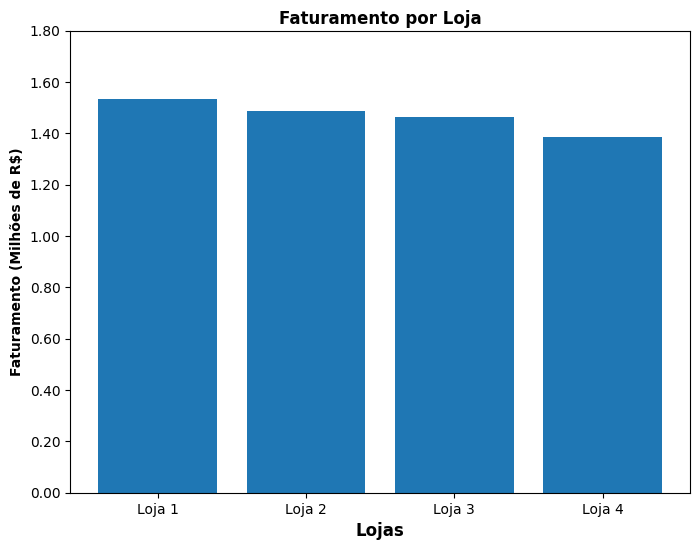

In [ ]:
plt.style.use('default')  # ou outro estilo que voc√™ preferir

# Criando uma lista para cada eixo do gr√°fico
faturamentos = [faturamento1, faturamento2, faturamento3, faturamento4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(8,6)) # This line is added to create fig and ax

plt.bar(x=lojas, height=faturamentos) # lojas para o eixo x e faturamentos para o eixo y
plt.style.use('classic')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.2f}'.format(x/1000000)))
plt.xlabel("Lojas", fontsize=12, fontweight='bold') # Adicionando um r√≥tulop para o eixo-x
plt.ylabel("Faturamento (Milh√µes de R$)", fontsize=10, fontweight='bold') # Adicionando um r√≥tulo para o eixo-y
plt.title("Faturamento por Loja", fontsize=12, fontweight = 'bold') # Adicionando um t√≠tulo para o gr√°fico
plt.show() # Exibindo o gr√°fico

In [ ]:
import os
print(os.getcwd())
!ls /content/

/content
sample_data


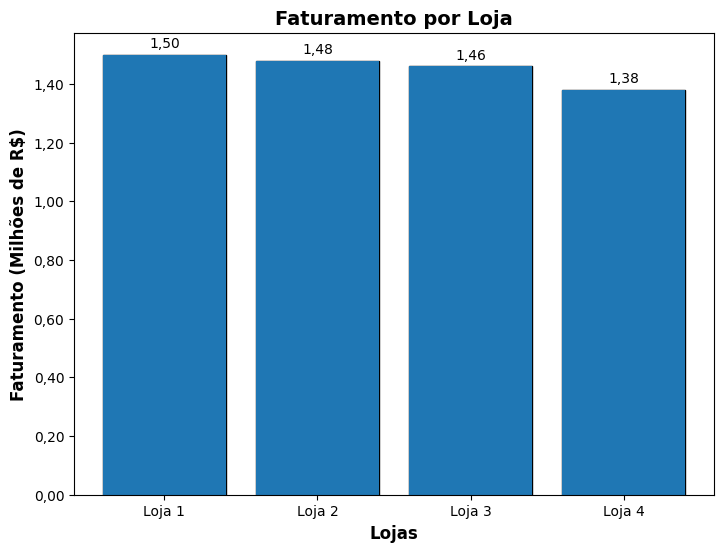

In [ ]:
#from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Mount Google Drive
#drive.mount('/content/drive')

# Definindo estilo antes de criar a figura
plt.style.use('default')  # fundo branco e visual clean

# Dados
faturamentos = [1500000, 1480000, 1460000, 1380000]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos_milhao = [f/1_000_000 for f in faturamentos]

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 6))  # Tamanho ajust√°vel

# Barras
bars = ax.bar(x=lojas, height=faturamentos, color='royalblue', edgecolor='black')

# Formatar valores do eixo y com separador de milhar
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.')))


# R√≥tulos e t√≠tulo
ax.set_xlabel("Lojas", fontsize=12, fontweight='bold')
ax.set_ylabel("Faturamento (Milh√µes de R$)", fontsize=12, fontweight='bold')
ax.set_title("Faturamento por Loja", fontsize=14, fontweight='bold')

# Ajustar margens laterais
plt.subplots_adjust(left=0.15, right=0.95)

# Adicionar r√≥tulos de valor acima de cada barra
bars = ax.bar(lojas, faturamentos)
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height/1000000:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=10)


# Salva o gr√°fico no Google Drive
#caminho_para_salvar = '/content/drive/MyDrive/Colab Notebooks/resultados/meu_grafico.png'
#plt.savefig(caminho_para_salvar)
#plt.close() # Importante fechar a figura para liberar mem√≥ria

# Exibir o gr√°fico
plt.show()

# Grid horizontal leve para facilitar leitura
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)  # grid atr√°s das barras

plt.show()

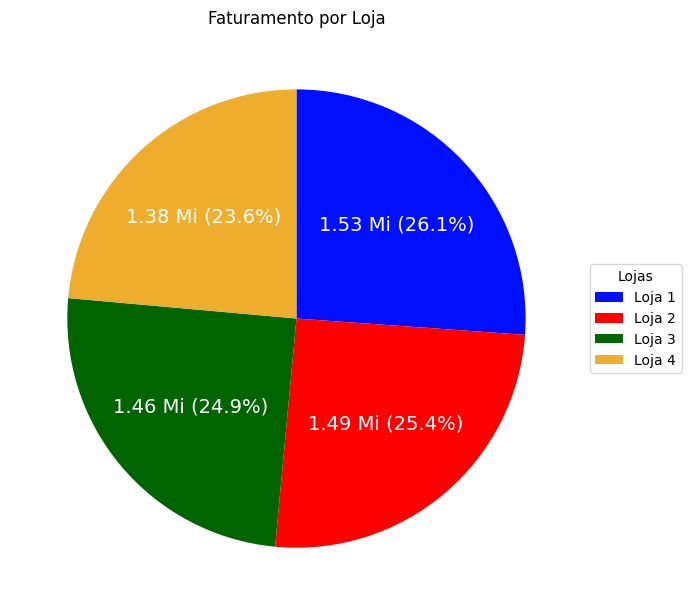

In [ ]:
import matplotlib.pyplot as plt

# Definindo estilo antes de criar a figura
plt.style.use('default')  # fundo branco e visual clean

# Lista com os faturamentos
faturamentos = [faturamento1, faturamento2, faturamento3, faturamento4]

# R√≥tulos das lojas
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Cores personalizadas (se quiser usar pr√≥ximas da imagem ou qualquer outra)
cores = ['#000FFF', '#FF0000', '#006400', '#EEAD2D']

# Fun√ß√£o para exibir percentual e valor no autopct
def func_pct_valor(pct, allvals):
    valor = pct/100.*sum(allvals)
    valor_formatado = f'{valor/1e6:.2f} Mi'
    return f'{valor_formatado} ({pct:.1f}%)'


# Criando o gr√°fico de pizza
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    faturamentos,
    labels=None,                     # sem labels diretos nas fatias
    colors=cores,
    autopct=lambda pct: func_pct_valor(pct, faturamentos),
    startangle=90,
    counterclock=False
)

# Adicionando legenda
plt.legend(
    wedges, lojas, title='Lojas', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1)
)

for text in texts:
    text.set_color('white')
    text.set_fontsize(14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(14)

# T√≠tulo
plt.title('Faturamento por Loja')

# Exibindo gr√°fico
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria
##Categorias mais populares##


Sem ordem de vendas do menor para o maior. **Resultado n√£o ordenando e apenas um loja.**

In [ ]:
import csv
import requests
from io import StringIO

# Baixar conte√∫do da URL
resposta = requests.get(url1)
conteudo = resposta.text

# Converter o conte√∫do para arquivo em mem√≥ria
arquivo_csv = StringIO(conteudo)
leitor = csv.reader(arquivo_csv)

# Pular o cabe√ßalho
next(leitor)

# Criar o dicion√°rio para somar vendas por categoria
faturamento_por_categoria = {}

# Ler linha por linha
for linha in leitor:
    categoria = linha[1]  # primeira coluna ‚Üí Categoria do Produto
    preco = float(linha[2])  # segunda coluna ‚Üí Pre√ßo

    if categoria in faturamento_por_categoria:
        faturamento_por_categoria[categoria] += preco
    else:
        faturamento_por_categoria[categoria] = preco

# Mostrar os totais por categoria
for categoria, total in faturamento_por_categoria.items():
    valor_formatado = format(total, ',.2f').replace(',', 'X').replace('.', ',').replace('X', '.')
    print(f'{categoria}: R$ {valor_formatado}')

eletronicos: R$ 572.659,23
moveis: R$ 250.178,11
brinquedos: R$ 23.993,78
eletrodomesticos: R$ 484.913,36
utilidades domesticas: R$ 16.931,48
esporte e lazer: R$ 52.387,55
livros: R$ 11.713,92
instrumentos musicais: R$ 121.731,69


Para que as categorias sejam apresentadas da maior venda para a menor acrescentei **a fun√ß√£o sorted()**.
Para isso seria melhor trabalhar com tuplas ao inv√©s de dicion√°rio. Ent√£o a mudan√ßa foi na estruruta de repeti√ß√£o:

de:
```
for categoria, total in faturamento_por_categoria.items():
```
para:
```
faturamento_ordenado = sorted(faturamento_por_categoria.items(), key=lambda item: item[1], reverse = True)
for categoria, total in faturamento_ordenado:
```

In [ ]:
import csv
import requests
from io import StringIO

# Baixar conte√∫do da URL
resposta = requests.get(url1)
conteudo = resposta.text

# Converter o conte√∫do para arquivo em mem√≥ria
arquivo_csv = StringIO(conteudo)
# l√™ linha por linha
leitor = csv.reader(arquivo_csv)

# Pular o cabe√ßalho
next(leitor)

# Criar o dicion√°rio para somar vendas por categoria
faturamento_por_categoria = {}

# Ler linha por linha
for linha in leitor:
    categoria = linha[1]  # primeira coluna ‚Üí Categoria do Produto
    preco = float(linha[2])  # segunda coluna ‚Üí Pre√ßo

    if categoria in faturamento_por_categoria:
        faturamento_por_categoria[categoria] += preco
    else:
        faturamento_por_categoria[categoria] = preco

# Ordenar o dicion√°rio do menor para o maior faturamento
faturamento_ordenado = sorted(faturamento_por_categoria.items(), key=lambda item: item[1], reverse = True)

# Mostrar os totais por categoria
for categoria, total in faturamento_ordenado:
    valor_formatado = format(total, ',.2f').replace(',', 'X').replace('.', ',').replace('X', '.')
    print(f'{categoria}: R$ {valor_formatado}')


eletronicos: R$ 572.659,23
eletrodomesticos: R$ 484.913,36
moveis: R$ 250.178,11
instrumentos musicais: R$ 121.731,69
esporte e lazer: R$ 52.387,55
brinquedos: R$ 23.993,78
utilidades domesticas: R$ 16.931,48
livros: R$ 11.713,92


#Por Loja#

In [ ]:
import csv
import requests
from io import StringIO

# Baixar conte√∫do da URL
urls = [url1, url2, url3, url4]  # Define urls as a list

for i in range(4):
  resposta = requests.get(urls[i]) # Access urls using index i
  conteudo = resposta.text

  # Converter o conte√∫do para arquivo em mem√≥ria
  arquivo_csv = StringIO(conteudo)
  leitor = csv.reader(arquivo_csv)

  # Pular o cabe√ßalho
  next(leitor)

  # Criar o dicion√°rio para somar vendas por loja e categoria
  faturamento_por_categoria = {}

  # Ler linha por linha
  for linha in leitor:
    categoria = linha[1]  # primeira coluna ‚Üí Categoria do Produto
    preco = float(linha[2])  # segunda coluna ‚Üí Pre√ßo

    if categoria in faturamento_por_categoria:
      faturamento_por_categoria[categoria] += preco
    else:
      faturamento_por_categoria[categoria] = preco

  # Ordenar o dicion√°rio do menor para o maior faturamento
  faturamento_ordenado = sorted(faturamento_por_categoria.items(), key=lambda item: item[1], reverse = True)

  # Mostrar os totais por loja e categoria
  print('')
  print(f'Loja{i+1}') # por loja
  print('')
  for categoria, total in faturamento_ordenado:
    valor_formatado = format(total, ',.2f').replace(',', 'X').replace('.', ',').replace('X', '.')
    print(f'{categoria}: R$ {valor_formatado}')


Loja1

eletronicos: R$ 572.659,23
eletrodomesticos: R$ 484.913,36
moveis: R$ 250.178,11
instrumentos musicais: R$ 121.731,69
esporte e lazer: R$ 52.387,55
brinquedos: R$ 23.993,78
utilidades domesticas: R$ 16.931,48
livros: R$ 11.713,92

Loja2

eletronicos: R$ 547.773,71
eletrodomesticos: R$ 464.758,13
moveis: R$ 235.234,68
instrumentos musicais: R$ 139.987,03
esporte e lazer: R$ 46.326,09
brinquedos: R$ 21.262,21
utilidades domesticas: R$ 19.662,86
livros: R$ 13.454,35

Loja3

eletronicos: R$ 547.699,92
eletrodomesticos: R$ 438.984,89
moveis: R$ 268.095,56
instrumentos musicais: R$ 103.174,45
esporte e lazer: R$ 47.456,10
brinquedos: R$ 25.869,20
utilidades domesticas: R$ 20.080,21
livros: R$ 12.664,70

Loja4

eletronicos: R$ 545.966,86
eletrodomesticos: R$ 377.680,65
moveis: R$ 256.705,65
instrumentos musicais: R$ 100.136,50
esporte e lazer: R$ 44.465,65
brinquedos: R$ 27.015,67
utilidades domesticas: R$ 20.098,83
livros: R$ 12.427,77


#Criar gr√°fico de vendas por catergora e por loja#

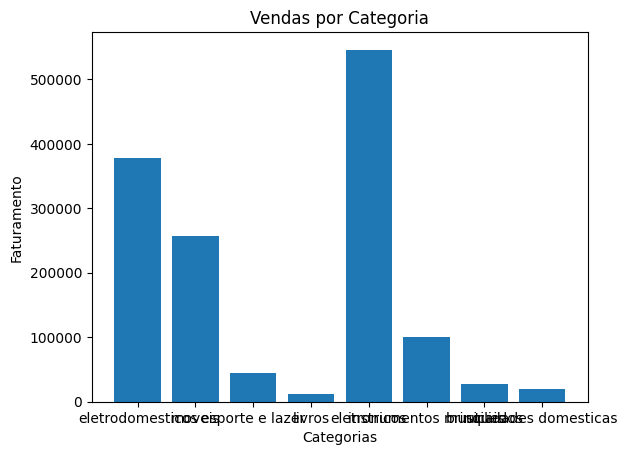

In [ ]:
# Definindo estilo antes de criar a figura
plt.style.use('default')  # fundo branco e visual clean

categorias = list(faturamento_por_categoria.keys())
valores = list(faturamento_por_categoria.values())

plt.bar(x=categorias, height=valores)
plt.xlabel("Categorias")
plt.ylabel("Faturamento")
plt.title("Vendas por Categoria")
plt.show()

Como o primeiro gr√°fico que fiz, do faturamento por loja, coincidiu de a sequencia loja1 at√© loja4 estar na ordem de faturamento do maior para o menor, ent√£o usei o mesmo c√≥digo para as Categorias e para minha surpresa o gr√°fico n√£o ficou apresent√°vel. Al√©m do que √© apresentado o resultado de somente uma loja.

Abaixo uma solu√ß√£o para apresentar as colunas de categorias por ordem do maior para o menor e foi melhorado a apresenta√ß√£o das categorias no eixo-x e formatado os valores e r√≥tulos para ficar mais apresent√°vel

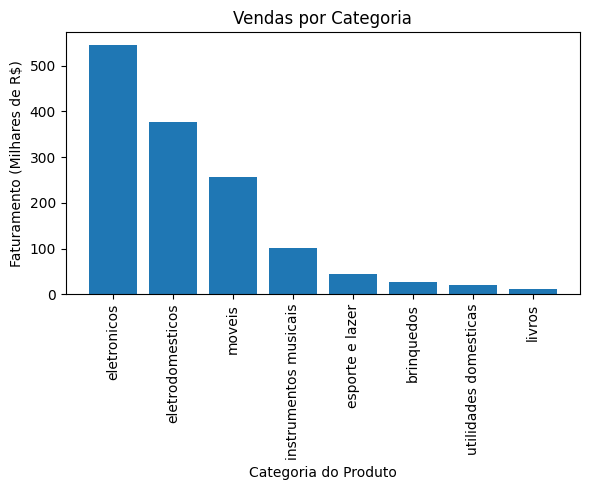

In [ ]:
# Definindo estilo antes de criar a figura
plt.style.use('default')  # fundo branco e visual clean

# Separar as categorias e os valores
categorias = [item[0] for item in faturamento_ordenado]
valores = [item[1] for item in faturamento_ordenado]

# Criar o gr√°fico
plt.figure(figsize=(6,5))
plt.bar(categorias, valores)

# Colocar as categorias na vertical (rotacionar o eixo X)
plt.xticks(rotation=90)

# Formatar o eixo Y para mostrar em milhares com separador de milhar
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:,.0f}'.replace(',', '.')))

# T√≠tulo e labels
plt.title('Vendas por Categoria')
plt.xlabel('Categoria do Produto')
plt.ylabel('Faturamento (Milhares de R$)')

# Mostrar o gr√°fico
plt.tight_layout()
plt.show()


Tamb√©m n√£o gostei da apresenta√ß√£o do gr√°fico e nota-se que ficaria bem melhor se as categorias fossem para o eixo-y. Assim criei o gr√°fico com barras horizontais **(apenas Loja 4)**

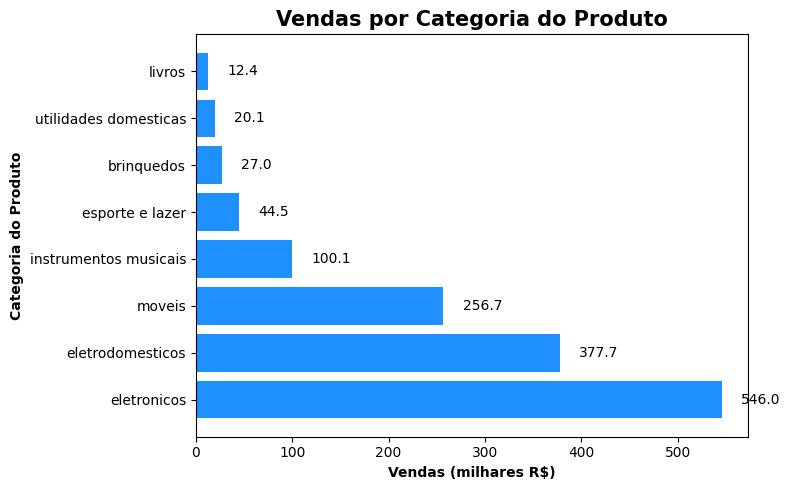

In [ ]:
# Definindo estilo antes de criar a figura
plt.style.use('default')  # fundo branco e visual clean

import matplotlib.pyplot as plt

categorias = [item[0] for item in faturamento_ordenado]
valores = [item[1] for item in faturamento_ordenado]

# Criar o gr√°fico de barras horizontais
plt.figure(figsize=(8,5))
bars = plt.barh(categorias, valores, color='dodgerblue')

# Adicionar os valores no final das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 20000, bar.get_y() + bar.get_height()/2,
             f'{width/1_000:.1f}', va='center')

# Formatar o eixo X para mostrar valores em milh√µes com separador de milhar
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000:.0f}'))

# T√≠tulo e labels
plt.title('Vendas por Categoria do Produto',fontsize=15, fontweight='bold')
plt.xlabel('Vendas (milhares R$)', fontsize=10, fontweight='bold')
plt.ylabel('Categoria do Produto', fontsize=10, fontweight='bold')

# Layout e exibi√ß√£o
plt.tight_layout()
plt.show()


Uma vez aprendido como fazer o gr√°fico om barras horizontais, agora fiz gr√°fico com **TODAS** as Lojas

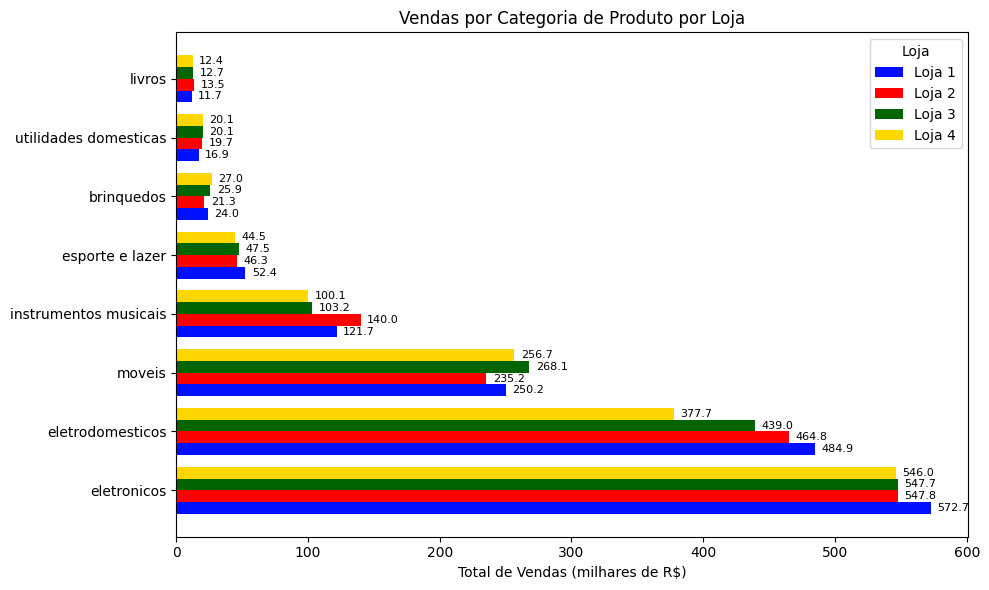

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definindo estilo antes de criar a figura
plt.style.use('default')  # fundo branco e visual clean

categorias = [item[0] for item in faturamento_ordenado]

faturamento_loja1 = loja1.groupby('Categoria do Produto')['Pre√ßo'].sum()
faturamento_loja2 = loja2.groupby('Categoria do Produto')['Pre√ßo'].sum()
faturamento_loja3 = loja3.groupby('Categoria do Produto')['Pre√ßo'].sum()
faturamento_loja4 = loja4.groupby('Categoria do Produto')['Pre√ßo'].sum()

faturamento_loja1 = faturamento_loja1.reindex(categorias, fill_value=0)
faturamento_loja2 = faturamento_loja2.reindex(categorias, fill_value=0)
faturamento_loja3 = faturamento_loja3.reindex(categorias, fill_value=0)
faturamento_loja4 = faturamento_loja4.reindex(categorias, fill_value=0)

# Valores para cada loja
loja_1 = faturamento_loja1.values
loja_2 = faturamento_loja2.values
loja_3 = faturamento_loja3.values
loja_4 = faturamento_loja4.values

# Agrupar os dados

valores = [loja_1, loja_2, loja_3, loja_4]

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Configurar a posi√ß√£o das categorias
y = np.arange(len(categorias))
altura_barra = 0.2  # altura de cada barra
deslocamentos = [-1.5*altura_barra, -0.5*altura_barra, 0.5*altura_barra, 1.5*altura_barra]

# Criar o gr√°fico
plt.figure(figsize=(10,6))

cores = ['#000FFF', '#FF0000', '#006400', '#FFD700']

for i, (valores_loja, cor) in enumerate(zip(valores, cores)):
    plt.barh(y + deslocamentos[i], valores_loja, height=altura_barra, color=cor, label=f'Loja {i+1}')

    # Adicionar os valores no final das barras
    for xi, yi in zip(valores_loja, y + deslocamentos[i]):
        plt.text(xi + 5000, yi, f'{xi/1000:.1f}', va='center', fontsize=8)

# Configura√ß√µes gerais
plt.yticks(y, categorias)
plt.xlabel('Total de Vendas (milhares de R$)')
plt.title('Vendas por Categoria de Produto por Loja')

# Formatar eixo X para Mi
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}'))

plt.legend(title='Loja')
plt.tight_layout()
plt.show()



Agora a avalia√ß√£o por Loja abaixo **com resultados n√£o ordenados:**

In [ ]:
import pandas as pd

# URLs dos CSVs (exemplo fict√≠cio ‚Äî substitua pelas suas URLs reais)
url_loja1 = url1
url_loja2 = url2
url_loja3 = url3
url_loja4 = url4

# Lista de URLs e nomes de lojas
urls = [url_loja1, url_loja2, url_loja3, url_loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Dicion√°rio para armazenar os faturamentos por loja
faturamentos_por_loja = {}

# Loop para processar cada loja
for i in range(4):
    # L√™ o CSV da loja
    df = pd.read_csv(urls[i])

    # Agrupa por categoria e soma os pre√ßos
    faturamento_categoria = df.groupby('Categoria do Produto')['Pre√ßo'].sum().to_dict()

    # Adiciona no dicion√°rio principal
    faturamentos_por_loja[nomes_lojas[i]] = faturamento_categoria

# Exibir resultados
for loja, categorias in faturamentos_por_loja.items():
    print(f'\n {loja}')
    for categoria, total in categorias.items():
        valor_formatado = format(total, ',.2f').replace(',', 'X').replace('.', ',').replace('X', '.')
        print(f'  {categoria}: R$ {valor_formatado}')



 Loja 1
  brinquedos: R$ 23.993,78
  eletrodomesticos: R$ 484.913,36
  eletronicos: R$ 572.659,23
  esporte e lazer: R$ 52.387,55
  instrumentos musicais: R$ 121.731,69
  livros: R$ 11.713,92
  moveis: R$ 250.178,11
  utilidades domesticas: R$ 16.931,48

 Loja 2
  brinquedos: R$ 21.262,21
  eletrodomesticos: R$ 464.758,13
  eletronicos: R$ 547.773,71
  esporte e lazer: R$ 46.326,09
  instrumentos musicais: R$ 139.987,03
  livros: R$ 13.454,35
  moveis: R$ 235.234,68
  utilidades domesticas: R$ 19.662,86

 Loja 3
  brinquedos: R$ 25.869,20
  eletrodomesticos: R$ 438.984,89
  eletronicos: R$ 547.699,92
  esporte e lazer: R$ 47.456,10
  instrumentos musicais: R$ 103.174,45
  livros: R$ 12.664,70
  moveis: R$ 268.095,56
  utilidades domesticas: R$ 20.080,21

 Loja 4
  brinquedos: R$ 27.015,67
  eletrodomesticos: R$ 377.680,65
  eletronicos: R$ 545.966,86
  esporte e lazer: R$ 44.465,65
  instrumentos musicais: R$ 100.136,50
  livros: R$ 12.427,77
  moveis: R$ 256.705,65
  utilidades domes

# 3. M√©dia de Avalia√ß√£o das Lojas

In [ ]:
import statistics

avaliacao1 = loja1['Avalia√ß√£o da compra'].mean()
avaliacao2 = loja2['Avalia√ß√£o da compra'].mean()
avaliacao3 = loja3['Avalia√ß√£o da compra'].mean()
avaliacao4 = loja4['Avalia√ß√£o da compra'].mean()

for i in range(4):
    # Corrected the variable name in f-string to match the iteration
    print(f'\nAvalia√ß√£o da loja {i+1}: {[avaliacao1, avaliacao2, avaliacao3, avaliacao4][i]:.2f}')


Avalia√ß√£o da loja 1: 3.98

Avalia√ß√£o da loja 2: 4.04

Avalia√ß√£o da loja 3: 4.05

Avalia√ß√£o da loja 4: 4.00


##Avaliando graficamente as avalia√ß√µs de cada loja##

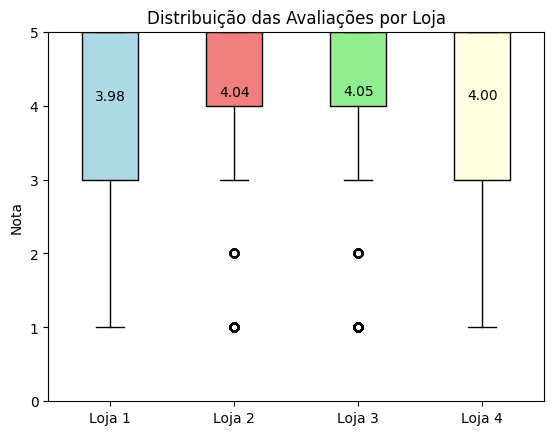

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

notas_loja1 = loja1['Avalia√ß√£o da compra'].values
notas_loja2 = loja2['Avalia√ß√£o da compra'].values
notas_loja3 = loja3['Avalia√ß√£o da compra'].values
notas_loja4 = loja4['Avalia√ß√£o da compra'].values

# Define colors for each box
colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightyellow']

# Create the boxplot with colors
bp = plt.boxplot([notas_loja1, notas_loja2, notas_loja3, notas_loja4],
                 tick_labels=lojas, patch_artist=True)

# Customize box colors
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add average values as text on the plot
for i, notas in enumerate([notas_loja1, notas_loja2, notas_loja3, notas_loja4]):
    avg = np.mean(notas)
    plt.text(i + 1, avg + 0.05, f'{avg:.2f}', ha='center', va='bottom')

plt.ylim(0, 5)
plt.title('Distribui√ß√£o das Avalia√ß√µes por Loja')
plt.ylabel('Nota')
plt.show()

# 4. Produtos Mais e Menos Vendidos

```python
# Ordenar o dicion√°rio do menor para o maior faturamento
faturamento_ordenado = sorted(faturamento_por_categoria.items(), key=lambda item: item[1], reverse = True)
```

In [ ]:
import pandas as pd

# URLs dos CSVs
url_loja1 = url1
url_loja2 = url2
url_loja3 = url3
url_loja4 = url4

# Lista de URLs e nomes de lojas
urls = [url_loja1, url_loja2, url_loja3, url_loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Dicion√°rio para armazenar os faturamentos por loja
faturamentos_por_loja = {}

# Loop para processar cada loja
for i in range(4):
    # L√™ o CSV da loja
    df = pd.read_csv(urls[i])

    # Agrupa por produto e soma os pre√ßos
    faturamento_produto = df.groupby('Produto')['Pre√ßo'].sum().to_dict()

    # Adiciona no dicion√°rio principal
    faturamentos_por_loja[nomes_lojas[i]] = faturamento_produto

# Exibir resultados
for loja, produtos in faturamentos_por_loja.items():
    print(f'\n* {loja}')

    produtos_ordenados = sorted(produtos.items(), key=lambda item: item[1], reverse=True)

    for produto, total in produtos_ordenados:
        valor_formatado = format(total, ',.2f').replace(',', 'X').replace('.', ',').replace('X', '.')
        print(f'  {produto}: R$ {valor_formatado}')


* Loja 1
  TV Led UHD 4K: R$ 189.534,28
  Geladeira: R$ 149.524,28
  Celular Plus X42: R$ 130.536,40
  Smart TV: R$ 89.936,15
  Lavadora de roupas: R$ 87.711,30
  Lava lou√ßas: R$ 82.739,86
  Secadora de roupas: R$ 78.749,73
  Tablet ABXY: R$ 63.520,11
  Bateria: R$ 50.258,34
  Guitarra: R$ 49.722,88
  Micro-ondas: R$ 46.348,89
  Celular ABXY: R$ 43.534,47
  Sof√° retr√°til: R$ 41.839,25
  Cama king: R$ 41.569,04
  Fog√£o: R$ 39.839,30
  Guarda roupas: R$ 39.282,78
  Bicicleta: R$ 36.592,38
  Cama box: R$ 29.459,35
  Cadeira de escrit√≥rio: R$ 23.556,36
  Impressora: R$ 21.884,23
  C√¥moda: R$ 20.905,92
  Viol√£o: R$ 18.765,28
  Kit banquetas: R$ 16.188,25
  Mesa de jantar: R$ 14.042,39
  Poltrona: R$ 13.172,23
  Assistente virtual: R$ 10.744,05
  Mesa de centro: R$ 10.162,54
  Jogo de tabuleiro: R$ 10.152,50
  Smartwatch: R$ 9.936,51
  Jogo de panelas: R$ 8.410,44
  Fone de ouvido: R$ 6.725,32
  Headset: R$ 6.307,71
  Mochila: R$ 5.156,50
  Carrinho controle remoto: R$ 5.015,28
  Mod

No c√≥digo acima os produtos est√£o ordenados pelos mais vendidos. Agora vamos aplicar **a regra 80/20**, em que 80% do faturamento vem de 20% dos produtos.

In [ ]:
for loja, produtos in faturamentos_por_loja.items():
    print(f'\n {loja}')

    # ordena os produtos pelo total faturado (do maior para o menor)
    produtos_ordenados = sorted(produtos.items(), key=lambda item: item[1], reverse=True)

    # calcula o faturamento total da loja
    faturamento_total = sum(produtos.values())
    meta_80 = faturamento_total * 0.8

    acumulado = 0
    produtos_80_20 = []

    for produto, total in produtos_ordenados:
        acumulado += total
        produtos_80_20.append((produto, total))
        if acumulado >= meta_80:
            break

    # Exibir produtos que representam 80% do faturamento
    print('Produtos que representam 80% do faturamento:')
    for produto, total in produtos_80_20:
        valor_formatado = format(total, ',.2f').replace(',', 'X').replace('.', ',').replace('X', '.')
        print(f'  {produto}: R$ {valor_formatado}')

    print(f'Faturamento total da loja: R$ {format(faturamento_total, ",.2f").replace(",", "X").replace(".", ",").replace("X", ".")}')


 Loja 1
Produtos que representam 80% do faturamento:
  TV Led UHD 4K: R$ 189.534,28
  Geladeira: R$ 149.524,28
  Celular Plus X42: R$ 130.536,40
  Smart TV: R$ 89.936,15
  Lavadora de roupas: R$ 87.711,30
  Lava lou√ßas: R$ 82.739,86
  Secadora de roupas: R$ 78.749,73
  Tablet ABXY: R$ 63.520,11
  Bateria: R$ 50.258,34
  Guitarra: R$ 49.722,88
  Micro-ondas: R$ 46.348,89
  Celular ABXY: R$ 43.534,47
  Sof√° retr√°til: R$ 41.839,25
  Cama king: R$ 41.569,04
  Fog√£o: R$ 39.839,30
  Guarda roupas: R$ 39.282,78
  Bicicleta: R$ 36.592,38
Faturamento total da loja: R$ 1.534.509,12

 Loja 2
Produtos que representam 80% do faturamento:
  Celular Plus X42: R$ 150.967,83
  TV Led UHD 4K: R$ 137.833,06
  Geladeira: R$ 130.176,48
  Lavadora de roupas: R$ 89.016,81
  Smart TV: R$ 81.522,94
  Secadora de roupas: R$ 78.820,31
  Lava lou√ßas: R$ 78.357,00
  Tablet ABXY: R$ 74.945,97
  Bateria: R$ 61.566,87
  Celular ABXY: R$ 55.558,43
  Guitarra: R$ 48.589,03
  Micro-ondas: R$ 48.256,37
  Fog√£o: R$

**E para finalizar os 5 mais vendidos e os 5 menos vendidos em todas as lojas**

In [ ]:
# Conjuntos para armazenar os top 5 e bottom 5 de cada loja
top_5_por_loja = []
bottom_5_por_loja = []

for loja, produtos in faturamentos_por_loja.items():
    # ordena os produtos pelo total faturado (do maior para o menor)
    produtos_ordenados = sorted(produtos.items(), key=lambda item: item[1], reverse=True)

    # Pegar os 5 mais vendidos e os 5 menos vendidos (pegar s√≥ o nome do produto)
    top_5 = set([produto for produto, total in produtos_ordenados[:5]])
    bottom_5 = set([produto for produto, total in produtos_ordenados[-5:]])

    # Adicionar ao conjunto geral
    top_5_por_loja.append(top_5)
    bottom_5_por_loja.append(bottom_5)

# Encontrar os comuns √†s quatro lojas (interse√ß√£o dos conjuntos)
comuns_top_5 = set.intersection(*top_5_por_loja)
comuns_bottom_5 = set.intersection(*bottom_5_por_loja)

# Exibir resultados
print('\n# Produtos comuns no TOP 5 de todas as lojas:')
if comuns_top_5:
    for produto in comuns_top_5:
        print(f'  {produto}')
else:
    print('  Nenhum produto em comum.')

print('\n# Produtos comuns nos 5 MENOS vendidos de todas as lojas:')
if comuns_bottom_5:
    for produto in comuns_bottom_5:
        print(f'  {produto}')
else:
    print('  Nenhum produto em comum.')


# Produtos comuns no TOP 5 de todas as lojas:
  Smart TV
  TV Led UHD 4K
  Celular Plus X42
  Geladeira

# Produtos comuns nos 5 MENOS vendidos de todas as lojas:
  Corda de pular
  Dinossauro Rex
  Cubo m√°gico 8x8
  Jogo de copos


# 5. Frete M√©dio por Loja


In [ ]:
frete = {
    "Loja 01": loja1['Frete'].sum(),
    "Loja 02": loja2['Frete'].sum(),
    "Loja 03": loja3['Frete'].sum(),
    "Loja 04": loja4['Frete'].sum()
}

print("\nFRETE\n")
for nome_loja, valor_frete in frete.items():

  print(f"Valor total do frete {nome_loja}:")
  print(f"R${valor_frete:,.2f}\n".replace(",", "X").replace(".", ",").replace("X", "."))

#MEDIA DE FRETE POR LOJA
media_frete = {
    "Loja 01": loja1['Frete'].mean(),
    "Loja 02": loja2['Frete'].mean(),
    "Loja 03": loja3['Frete'].mean(),
    "Loja 04": loja4['Frete'].mean()
}

for nome_loja, mediafrete in media_frete.items():
  print(f"O valor m√©dio do frete da {nome_loja}")
  print(f"R${mediafrete:.2f}\n".replace(",", "X").replace(".", ",").replace("X", "."))


FRETE

Valor total do frete Loja 01:
R$81.837,97

Valor total do frete Loja 02:
R$79.314,16

Valor total do frete Loja 03:
R$78.022,66

Valor total do frete Loja 04:
R$73.755,88

O valor m√©dio do frete da Loja 01
R$34,69

O valor m√©dio do frete da Loja 02
R$33,62

O valor m√©dio do frete da Loja 03
R$33,07

O valor m√©dio do frete da Loja 04
R$31,28



#6. Relat√≥rio

Das quatro lojas do Sr Jo√£o, que pertencem ao e-commerce Alura Store, h√° pouca diferen√ßa de faturmento entre elas. O faturamento de cada uma delas √©:


+ Loja 1: R$ 1.534.509,12

+ Loja 2: R$ 1.488.459,06

+ Loja 3: R$ 1.464.025,03

+ Loja 4: R$ 1.384.497,58


O gr√°fico de barras a seguir mostra que a maior diferen√ßa entre elas √© da Loja 1 par a Loja 4, **uma diferen√ßa que n√£o chega a 10%.**  

+ Loja com maior faturamento: Loja 1 (R$ 1.534.509,12)

+ Diferen√ßa da Loja 2 para a Loja 1: R$ 46.050,06 (3,0%)

+ Diferen√ßa da Loja 3 para a Loja 1: R$ 70.484,09 (4,6%)

+ Diferen√ßa da Loja 4 para a Loja 1: R$ 150.011,54 (9,8%)


Do ponto de vista das Avalia√ß√µes todas as 4 Lojas s√£o muito bem avaliadas:

+ Avalia√ß√£o da loja 1: 3.98

+ Avalia√ß√£o da loja 2: 4.04

+ Avalia√ß√£o da loja 3: 4.05

+ Avalia√ß√£o da loja 4: 4.00

E quanto aos Produtos Mais e Menos vendidos n√£o h√° nenhuma discrep√¢ncia, todas mantendo as mesmas Categorias:

+ Mais vendidos
    * eletr√¥nicos
    * eletrodom√©sticos
    * m√≥veis
+ Menos vendidps
    * brinquedos
    * utilidades dom√©sticas
    * livros

**Sendo que eletr√¥nicos, eletrodom√©sticos e m√≥veis correspondem a cerca de 80% das vendas.**

Outro dado importante √© o Frete M√©dio que como podemos ver pela an√°ise dos dados n√£o demonstrou quase nenhuma varia√ß√£o:

+ O valor m√©dio do frete:
    * Loja 01: R$ 34,69
    * Loja 02: R$ 33,62
    * Loja 03: R$ 33,07
    * Loja 04: R$ 31,28

Se um das lojas apresentasse um valor muito discrepante com rela√ß√£o ao Frete M√©dio isso poderia indicar um posicionamento log√≠stico desvatajoso em rela√ß√£o √†s demais, mas n√£o √© isso que observamos.

Com base em todas essas an√°lises, vemos que o Sr Jo√£o tem 4 bons neg√≥cios o que valoriza a sua decis√£o de vender uma das lojas para investir em um novo neg√≥cio. Isso porque se uma das Lojas tivesse um desempenho muito discrepante com rela√ß√£o √†s demais, isso desvalorizaria essa loja e a tornaria menos atraente para um potencial comprador. Logo ele pode usar o faturamento da Loja 1 como um atrativo para vender a Loja 4.

Os dados n√£o permitem uma avalia√ß√£o mais precisa como margem de lucro, taxa de crescimento, posicionamento de mercado e nicho, base de clientes, tr√°fego do e-commerce e taxas de convers√£o entre outras.

Assim o natural seria vender a Loja 4 pois em termos absolutos ela √© a de menor faturamento. Mas em compara√ß√£o com o desempenho das outras isso a valoriza como um bom neg√≥cio para o potencial comprador que pode aplicar seu gerenciamento do neg√≥cio para obter pelo menos um faturamento extra de R$ 150.000,00 por ano igualando-se √† Loja1.

**O sr joao deve vender a Loja 4**

üìå **Conclus√£o**

O Sr. Jo√£o tem 4 bons neg√≥cios. Como nenhuma loja apresenta desempenho discrepante, o faturamento da Loja 1 pode ser usado como refer√™ncia para valorizar a venda da Loja 4.

Apesar de menor faturamento, a Loja 4 se mostra atrativa, podendo o comprador, com boa gest√£o, **obter pelo menos R$ 150.000,00 extras por ano**, nivelando-a com a Loja 1.

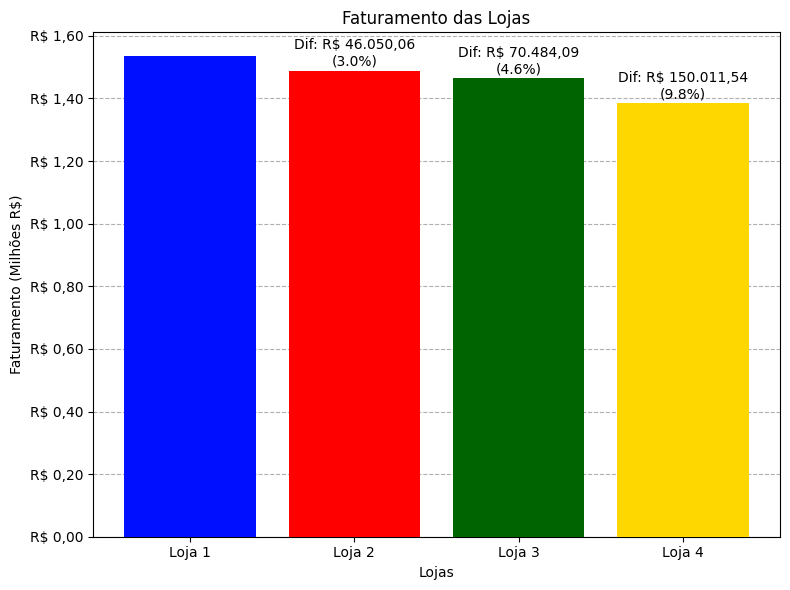

Loja com maior faturamento: Loja 1 (R$ 1.534.509,12)
Diferen√ßa da Loja 2 para a Loja 1: R$ 46.050,06 (3.0%)
Diferen√ßa da Loja 3 para a Loja 1: R$ 70.484,09 (4.6%)
Diferen√ßa da Loja 4 para a Loja 1: R$ 150.011,54 (9.8%)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

faturamentos = [faturamento1, faturamento2, faturamento3, faturamento4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

maior_faturamento = max(faturamentos)
loja_maior = lojas[faturamentos.index(maior_faturamento)]

diferencas_abs = [maior_faturamento - fat for fat in faturamentos]
diferencas_perc = [(diff / maior_faturamento) * 100 for diff in diferencas_abs]

plt.figure(figsize=(8, 6)) # largura para melhor visualiza√ß√£o das anota√ß√µes

# Adiciona a grade no eixo y e coloca atr√°s das barras
plt.grid(axis='y', linestyle='--', zorder=-1) # zorder=0 coloca a grade atr√°s

# Desenha as barras primeiro
bars = plt.bar(lojas, faturamentos, color=['#000FFF', '#FF0000', '#006400', '#FFD700'], zorder=3)
plt.xlabel("Lojas")
plt.ylabel("Faturamento (Milh√µes R$)")
plt.title("Faturamento das Lojas")

# Fun√ß√£o para formatar como moeda no eixo-y
def format_br_currency(value):
    return f'R$ {value/1_000_000:,.2f}'.replace(',', '#temp#').replace('.', ',').replace('#temp#', '.')

# Fun√ß√£o para formatar como moeda nos r√≥tulos e texto
def format_br_currency1(value):
    return f'R$ {value:,.2f}'.replace(',', '#temp#').replace('.', ',').replace('#temp#', '.')

# Adicionando anota√ß√µes com a diferen√ßa formatada
for i, loja in enumerate(lojas):
    if loja != loja_maior:
        diff_abs = diferencas_abs[i]
        diff_perc = diferencas_perc[i]
        y_position = faturamentos[i] + 7000 # Ajustei um pouco a posi√ß√£o vertical
        plt.text(i, y_position, f'Dif: {format_br_currency1(diff_abs)}\n({diff_perc:.1f}%)', ha='center', va='bottom')

# Formatando o eixo y para moeda brasileira
def format_y_ticks(value, pos):
    return format_br_currency(value)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_y_ticks))

plt.tight_layout() # Ajusta o layout para evitar cortes nas anota√ß√µes
plt.show()

print(f"Loja com maior faturamento: {loja_maior} ({format_br_currency1(maior_faturamento)})")
for i, loja in enumerate(lojas):
    if loja != loja_maior:
        print(f"Diferen√ßa da {loja} para a {loja_maior}: {format_br_currency1(diferencas_abs[i])} ({diferencas_perc[i]:.1f}%)")